# Data Preprocessing

## Importing the Libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
pip install flaml

     |████████████████████████████████| 157 kB 10.5 MB/s 
     |████████████████████████████████| 2.0 MB 28.7 MB/s 
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3


In [6]:
!pip install scikit-learn-intelex

     |████████████████████████████████| 69 kB 4.1 MB/s 
     |████████████████████████████████| 22.5 MB 1.4 MB/s 
     |████████████████████████████████| 284.3 MB 1.4 kB/s 
     |████████████████████████████████| 4.0 MB 38.3 MB/s 


In [7]:
#Accelerating Scikit-learn
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [8]:
import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import missingno as msno

## Importing the dataset

In [9]:
data=pd.read_csv("healthcare-dataset-stroke-data.csv")

In [10]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [11]:
data.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

## Data Visualization

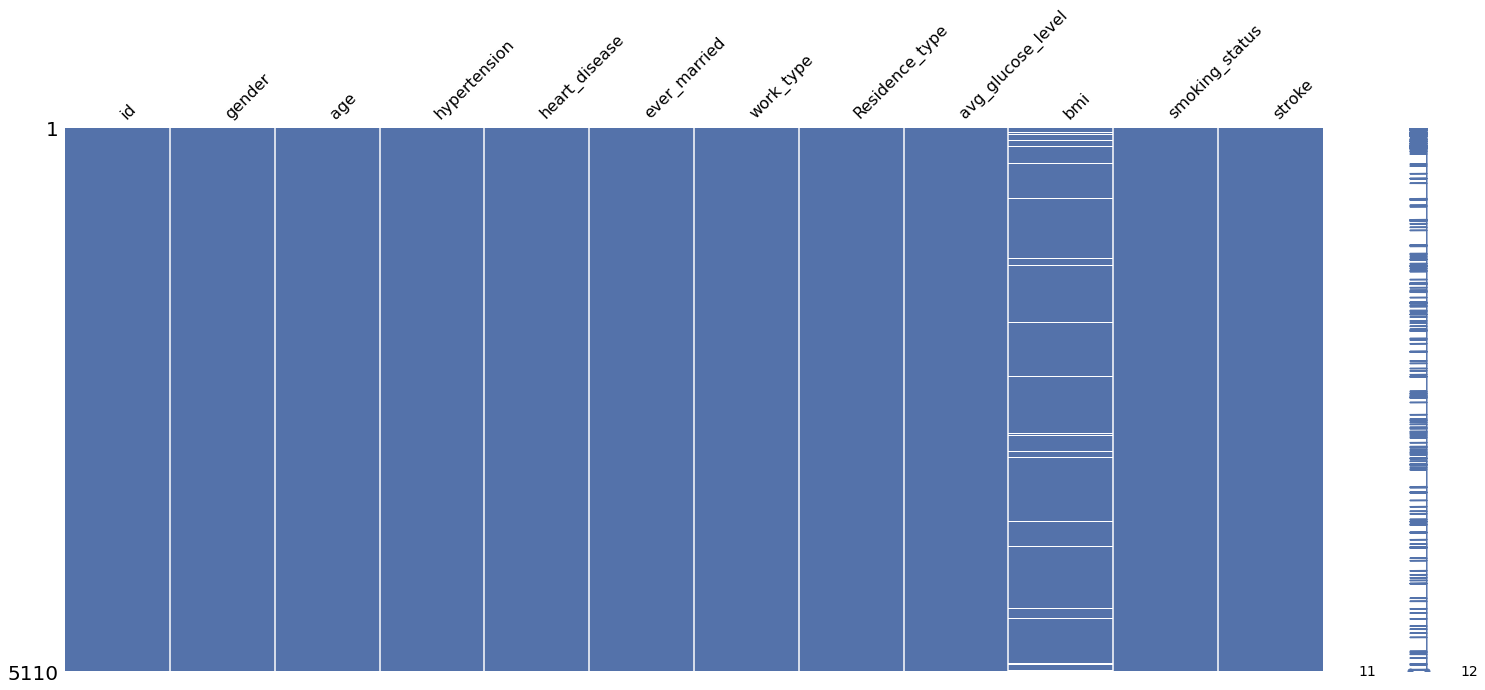

In [12]:
msno.matrix(data,color=(.33,.45,.67))
#It seem that we have random missing values on the 'bmi

In [13]:
fig = px.histogram(data, x="age", color="stroke",color_discrete_map={0:'purple',1:'red'})
fig.show()
# it can be clearly be seen that the people having age above 50 suffered stroke more.

In [14]:
fig = px.histogram(data, x="ever_married", color="stroke",color_discrete_map={0:'purple',1:'red'},height=800)
fig.show()

print("Married person has stroke rate of",220/5110*100,"%")
print("Unmarried person has stroke rate of",29/5110*100,"%")

#If you marry more chances are there you will die :))))))

Married person has stroke rate of 4.305283757338552 %
Unmarried person has stroke rate of 0.5675146771037182 %


In [15]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

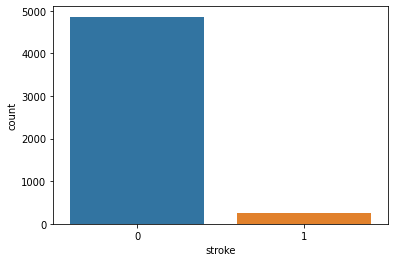

In [16]:
sns.countplot(x ='stroke', data = data)
#data is imbalanced

## Splitting into dependent and independent variables

In [17]:
xtrain = data.drop(columns=['stroke','id'])

In [18]:
ytrain = data.stroke

In [19]:
ytrain

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [20]:
cols = xtrain.columns
num_cols= xtrain._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

## Encoding

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
data1 = xtrain[cat_cols].apply(LabelEncoder().fit_transform)
trainx = data1.join(data[num_cols])

In [23]:
trainx=trainx.drop(columns=['bmi'])

In [24]:
trainx

,gender,Residence_type,work_type,smoking_status,ever_married,age,hypertension,heart_disease,avg_glucose_level
0,1,1,2,1,1,67.0,0,1,228.69
1,0,0,3,2,1,61.0,0,0,202.21
2,1,0,2,2,1,80.0,0,1,105.92
3,0,1,2,3,1,49.0,0,0,171.23
4,0,0,3,2,1,79.0,1,0,174.12
...,...,...,...,...,...,...,...,...,...
5105,0,1,2,2,1,80.0,1,0,83.75
5106,0,1,3,2,1,81.0,0,0,125.20
5107,0,0,3,2,1,35.0,0,0,82.99
5108,1,0,2,1,1,51.0,0,0,166.29


## Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(trainx, ytrain, test_size=0.15, random_state=50)

# Ensemble Learning

In [26]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [27]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()

In [28]:
RFC.fit(x_train,y_train)   

RandomForestClassifier()

In [29]:
y_pred=RFC.predict_proba(x_test)

In [30]:
def threshold(model,min_threshold=0.1,max_threshold=0.8):
    step_factor = 0.01
    min_threshold = 0.2
    roc_score=0
    predicted_proba = model.predict_proba(x_train) 
    while min_threshold <=max_threshold: 
        temp_thresh = min_threshold
        predicted = (predicted_proba [:,1] >= temp_thresh).astype('int') 
        # print('Threshold',temp_thresh,'--',roc_auc_score(y_train, predicted))
        if roc_score<roc_auc_score(y_train, predicted):
            roc_score = roc_auc_score(y_train, predicted)
            thrsh_score = min_threshold
        min_threshold = min_threshold + step_factor
    print('---Optimum Threshold ---',thrsh_score,'--ROC--',roc_score)
    return thrsh_score

In [31]:
thrsvalue=threshold(RFC)

---Optimum Threshold --- 0.37000000000000016 --ROC-- 1.0


In [32]:
y_pred = y_pred[:, 1]

In [33]:
ans=[]

In [34]:
for i in range(len(y_pred)):
  if y_pred[i]>=thrsvalue:
    ans.append(1)
  else:
    ans.append(0)

In [35]:
report = pd.DataFrame(classification_report(y_test, ans, output_dict=True))

In [36]:
report

,0,1,accuracy,macro avg,weighted avg
precision,0.953826,0.111111,0.943937,0.532468,0.914272
recall,0.989056,0.027778,0.943937,0.508417,0.943937
f1-score,0.971122,0.044444,0.943937,0.507783,0.927627
support,731.000000,36.000000,0.943937,767.000000,767.000000


# Boosting

In [37]:
pip install catboost

     |████████████████████████████████| 76.6 MB 70 kB/s 


In [38]:
import lightgbm as lgb
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [39]:
LGBM = lgb.LGBMClassifier()

In [40]:
CAT = CatBoostClassifier()

In [41]:
XG = xgb.XGBClassifier()

In [42]:
LGBM.fit(x_train, y_train)

LGBMClassifier()

In [43]:
preds = LGBM.predict(x_test)

In [44]:
report = pd.DataFrame(classification_report(y_test, preds, output_dict=True))
report

,0,1,accuracy,macro avg,weighted avg
precision,0.952756,0.0,0.946545,0.476378,0.908037
recall,0.993160,0.0,0.946545,0.496580,0.946545
f1-score,0.972539,0.0,0.946545,0.486269,0.926891
support,731.000000,36.0,0.946545,767.000000,767.000000


In [45]:
thrsvalue=threshold(LGBM)

---Optimum Threshold --- 0.22000000000000003 --ROC-- 0.9854516932101081


In [46]:
y_pred = LGBM.predict_proba(x_test)

In [47]:
y_pred = y_pred[:, 1]

In [48]:
ans=[]

In [49]:
for i in range(len(y_pred)):
  if y_pred[i]>=thrsvalue:
    ans.append(1)
  else:
    ans.append(0)

In [50]:
report = pd.DataFrame(classification_report(y_test, ans, output_dict=True))
report

,0,1,accuracy,macro avg,weighted avg
precision,0.960811,0.259259,0.936115,0.610035,0.927883
recall,0.972640,0.194444,0.936115,0.583542,0.936115
f1-score,0.966689,0.222222,0.936115,0.594456,0.931747
support,731.000000,36.000000,0.936115,767.000000,767.000000


In [51]:
CAT.fit(x_train, y_train)

Learning rate set to 0.019287
0:	learn: 0.6579009	total: 49.1ms	remaining: 49s
1:	learn: 0.6281037	total: 50.9ms	remaining: 25.4s
2:	learn: 0.6008443	total: 52.7ms	remaining: 17.5s
3:	learn: 0.5767537	total: 54.4ms	remaining: 13.6s
4:	learn: 0.5565189	total: 56.2ms	remaining: 11.2s
5:	learn: 0.5378810	total: 57.4ms	remaining: 9.51s
6:	learn: 0.5164818	total: 59.3ms	remaining: 8.42s
7:	learn: 0.4983978	total: 61ms	remaining: 7.56s
8:	learn: 0.4827669	total: 62.3ms	remaining: 6.85s
9:	learn: 0.4609011	total: 64.2ms	remaining: 6.36s
10:	learn: 0.4412293	total: 66ms	remaining: 5.94s
11:	learn: 0.4225875	total: 72.9ms	remaining: 6s
12:	learn: 0.4101545	total: 74.8ms	remaining: 5.68s
13:	learn: 0.3968638	total: 76.5ms	remaining: 5.39s
14:	learn: 0.3858418	total: 78ms	remaining: 5.12s
15:	learn: 0.3747714	total: 80ms	remaining: 4.92s
16:	learn: 0.3615327	total: 82ms	remaining: 4.74s
17:	learn: 0.3527567	total: 83.4ms	remaining: 4.55s
18:	learn: 0.3409155	total: 85.2ms	remaining: 4.4s
19:	lear

In [52]:
preds = CAT.predict(x_test)

In [53]:
report = pd.DataFrame(classification_report(y_test, preds, output_dict=True))
report

,0,1,accuracy,macro avg,weighted avg
precision,0.954128,0.250000,0.950456,0.602064,0.921079
recall,0.995896,0.027778,0.950456,0.511837,0.950456
f1-score,0.974565,0.050000,0.950456,0.512282,0.931169
support,731.000000,36.000000,0.950456,767.000000,767.000000


In [54]:
thrsvalue=threshold(CAT)

---Optimum Threshold --- 0.2 --ROC-- 0.8836180927372143


In [55]:
y_pred = CAT.predict_proba(x_test)

In [56]:
y_pred = y_pred[:, 1]

In [57]:
ans=[]

In [58]:
for i in range(len(y_pred)):
  if y_pred[i]>=thrsvalue:
    ans.append(1)
  else:
    ans.append(0)

In [59]:
report = pd.DataFrame(classification_report(y_test, ans, output_dict=True))
report

,0,1,accuracy,macro avg,weighted avg
precision,0.962213,0.307692,0.940026,0.634953,0.931493
recall,0.975376,0.222222,0.940026,0.598799,0.940026
f1-score,0.968750,0.258065,0.940026,0.613407,0.935393
support,731.000000,36.000000,0.940026,767.000000,767.000000


In [60]:
XG.fit(x_train, y_train)

XGBClassifier()

In [61]:
preds = XG.predict(x_test)

In [62]:
report = pd.DataFrame(classification_report(y_test, preds, output_dict=True))
report

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



,0,1,accuracy,macro avg,weighted avg
precision,0.953064,0.0,0.953064,0.476532,0.908331
recall,1.000000,0.0,0.953064,0.500000,0.953064
f1-score,0.975968,0.0,0.953064,0.487984,0.930160
support,731.000000,36.0,0.953064,767.000000,767.000000


In [63]:
thrsvalue=threshold(XG,0.1,0.9)

---Optimum Threshold --- 0.2 --ROC-- 0.6880025918221192


In [64]:
y_pred = XG.predict_proba(x_test)

In [65]:
y_pred = y_pred[:, 1]

In [66]:
ans=[]

In [67]:
for i in range(len(y_pred)):
  if y_pred[i]>=thrsvalue:
    ans.append(1)
  else:
    ans.append(0)

In [68]:
report = pd.DataFrame(classification_report(y_test, ans, output_dict=True))
report

,0,1,accuracy,macro avg,weighted avg
precision,0.962416,0.363636,0.945241,0.663026,0.934312
recall,0.980848,0.222222,0.945241,0.601535,0.945241
f1-score,0.971545,0.275862,0.945241,0.623703,0.938892
support,731.000000,36.000000,0.945241,767.000000,767.000000


[0.06507859 0.03948203 0.10433896 0.06330757 0.08872642 0.3632443
 0.07084225 0.1128995  0.09208034]


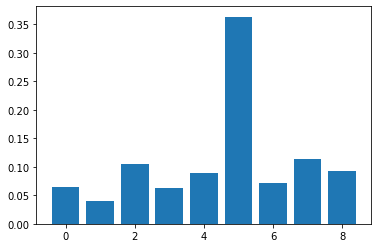

In [69]:
print(XG.feature_importances_)
# plot
plt.bar(range(len(XG.feature_importances_)), XG.feature_importances_)
plt.show()

# Undersampling


when minority class less than ~15-10% doing oversampling is pointless because minority portions is too low, and it considers as anomaly detection.
If we apply smote for oversampling for this kind of problem, what happens is creating more samples but with lack of enough variance.

In [70]:
dataset=[trainx,ytrain]
df_train= pd.concat(dataset,axis=1)

In [71]:
nonStroke = df_train[df_train['stroke'] == 0][0:220]
Stroke = df_train[df_train['stroke'] == 1]

In [72]:
newdf = pd.concat([nonStroke,Stroke],axis = 0)

In [73]:
newdf

,gender,Residence_type,work_type,smoking_status,ever_married,age,hypertension,heart_disease,avg_glucose_level,stroke
249,1,0,4,0,0,3.0,0,0,95.12,0
250,1,1,2,2,1,58.0,1,0,87.96,0
251,0,1,2,0,0,8.0,0,0,110.89,0
252,0,0,2,1,1,70.0,0,0,69.04,0
253,1,0,1,0,0,14.0,0,0,161.28,0
...,...,...,...,...,...,...,...,...,...,...
244,1,0,2,0,1,57.0,0,0,84.96,1
245,0,0,4,0,0,14.0,0,0,57.93,1
246,0,0,3,1,1,75.0,0,0,78.80,1
247,1,0,3,0,1,71.0,1,0,87.80,1


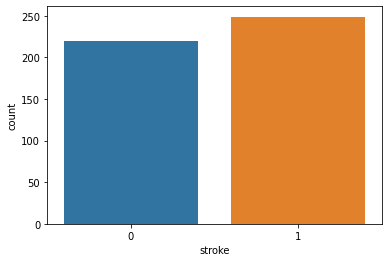

In [74]:
sns.countplot(x ='stroke', data = newdf)
#data is balanced

In [75]:
from sklearn.neural_network import MLPClassifier

In [76]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(newdf.iloc[:,:9], newdf['stroke'], stratify=newdf['stroke'],
                                                    random_state=1,test_size=0.15)

In [77]:
MLP = MLPClassifier(hidden_layer_sizes=(4,2),random_state=1, max_iter=3000).fit(Xtrain, Ytrain)

In [78]:
Ypred=MLP.predict(Xtest)

In [79]:
pd.DataFrame(classification_report(Ytest, Ypred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.724138,0.714286,0.71831,0.719212,0.718865
recall,0.636364,0.789474,0.71831,0.712919,0.718310
f1-score,0.677419,0.750000,0.71831,0.713710,0.716265
support,33.000000,38.000000,0.71831,71.000000,71.000000


In [80]:
from flaml import AutoML
automl = AutoML()
automl.fit(Xtrain, Ytrain, task="classification",estimator_list=[ "xgboost", "rf",'extra_tree','lrl1'],time_budget=200)

[flaml.automl: 05-02 17:25:10] {2105} INFO - task = classification
INFO:flaml.automl:task = classification
[flaml.automl: 05-02 17:25:10] {2107} INFO - Data split method: stratified
INFO:flaml.automl:Data split method: stratified
[flaml.automl: 05-02 17:25:10] {2111} INFO - Evaluation method: cv
INFO:flaml.automl:Evaluation method: cv
[flaml.automl: 05-02 17:25:10] {2188} INFO - Minimizing error metric: 1-roc_auc
INFO:flaml.automl:Minimizing error metric: 1-roc_auc
[flaml.automl: 05-02 17:25:10] {2281} INFO - List of ML learners in AutoML Run: ['xgboost', 'rf', 'extra_tree', 'lrl1']
INFO:flaml.automl:List of ML learners in AutoML Run: ['xgboost', 'rf', 'extra_tree', 'lrl1']
[flaml.automl: 05-02 17:25:10] {2567} INFO - iteration 0, current learner xgboost
INFO:flaml.automl:iteration 0, current learner xgboost
[flaml.automl: 05-02 17:25:10] {2698} INFO - Estimated sufficient time budget=1162s. Estimated necessary time budget=12s.
INFO:flaml.automl:Estimated sufficient time budget=1162s. 

In [81]:
automl.model.estimator

ExtraTreesClassifier(criterion='entropy', max_features=1.0, max_leaf_nodes=4,
                     n_estimators=6, n_jobs=-1)

In [82]:
Ypred=automl.predict(Xtest)

In [83]:
accuracy_score(Ytest, Ypred)

0.7183098591549296

In [84]:
pd.DataFrame(classification_report(Ytest, Ypred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.709677,0.725000,0.71831,0.717339,0.717878
recall,0.666667,0.763158,0.71831,0.714912,0.718310
f1-score,0.687500,0.743590,0.71831,0.715545,0.717520
support,33.000000,38.000000,0.71831,71.000000,71.000000


# Oversampling

**Oversampling**

In [85]:
dataset=[trainx,ytrain]
df_train= pd.concat(dataset, axis=1)

In [86]:
df_train

,gender,Residence_type,work_type,smoking_status,ever_married,age,hypertension,heart_disease,avg_glucose_level,stroke
0,1,1,2,1,1,67.0,0,1,228.69,1
1,0,0,3,2,1,61.0,0,0,202.21,1
2,1,0,2,2,1,80.0,0,1,105.92,1
3,0,1,2,3,1,49.0,0,0,171.23,1
4,0,0,3,2,1,79.0,1,0,174.12,1
...,...,...,...,...,...,...,...,...,...,...
5105,0,1,2,2,1,80.0,1,0,83.75,0
5106,0,1,3,2,1,81.0,0,0,125.20,0
5107,0,0,3,2,1,35.0,0,0,82.99,0
5108,1,0,2,1,1,51.0,0,0,166.29,0


In [87]:
df_train['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [88]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df_train[(df_train['stroke']==0)] 
df_minority = df_train[(df_train['stroke']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 4861, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [89]:
df_upsampled

,gender,Residence_type,work_type,smoking_status,ever_married,age,hypertension,heart_disease,avg_glucose_level,stroke
102,0,0,2,1,1,74.0,0,0,231.61,1
179,1,1,2,0,1,81.0,0,0,213.22,1
92,0,1,3,2,0,57.0,0,0,68.02,1
14,0,1,2,2,1,79.0,0,1,214.09,1
106,0,0,2,1,1,50.0,1,0,73.18,1
...,...,...,...,...,...,...,...,...,...,...
5105,0,1,2,2,1,80.0,1,0,83.75,0
5106,0,1,3,2,1,81.0,0,0,125.20,0
5107,0,0,3,2,1,35.0,0,0,82.99,0
5108,1,0,2,1,1,51.0,0,0,166.29,0


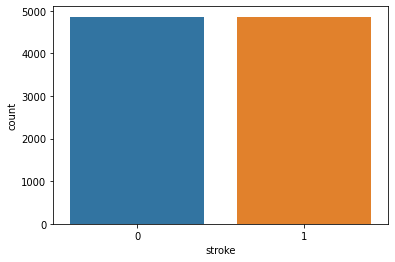

In [90]:
sns.countplot(x ='stroke', data = df_upsampled)
#data is balanced

In [91]:
df_upsampled.iloc[:,:9]

,gender,Residence_type,work_type,smoking_status,ever_married,age,hypertension,heart_disease,avg_glucose_level
102,0,0,2,1,1,74.0,0,0,231.61
179,1,1,2,0,1,81.0,0,0,213.22
92,0,1,3,2,0,57.0,0,0,68.02
14,0,1,2,2,1,79.0,0,1,214.09
106,0,0,2,1,1,50.0,1,0,73.18
...,...,...,...,...,...,...,...,...,...
5105,0,1,2,2,1,80.0,1,0,83.75
5106,0,1,3,2,1,81.0,0,0,125.20
5107,0,0,3,2,1,35.0,0,0,82.99
5108,1,0,2,1,1,51.0,0,0,166.29


In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(df_upsampled.iloc[:,:9], df_upsampled['stroke'], test_size=0.2, random_state=50)

In [93]:
from sklearn import svm

In [94]:
clf = svm.SVC(kernel='linear')

In [95]:
clf.fit(X_train,Y_train)

KeyboardInterrupt: ignored

In [ ]:
pred=clf.predict(X_test)

In [ ]:
pd.DataFrame(classification_report(Y_test, pred, output_dict=True))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, Y_train)

In [ ]:
Y_pred=neigh.predict(X_test)

In [ ]:
pd.DataFrame(classification_report(Y_test, Y_pred, output_dict=True))

In [ ]:
from flaml import AutoML
automl = AutoML()
automl.fit(X_train, Y_train, task="classification",estimator_list=[ "xgboost", "rf",'extra_tree','lrl1'],time_budget=250)

In [ ]:
automl.model.estimator

In [ ]:
y_pred=automl.predict(X_test)

In [ ]:
accuracy_score(Y_test, y_pred)

###Pipeline

In [97]:
from sklearn.pipeline import Pipeline
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn import set_config
from xgboost import XGBClassifier
steps = [
    ("preprocessing", LabelEncoder()),
    ("Classifier", XGBClassifier(colsample_bylevel=0.7142801381920149, colsample_bytree=1.0,
              grow_policy='lossguide', learning_rate=0.004338606755663443,
              max_depth=0, max_leaves=477, min_child_weight=0.14197509384544463,
              n_estimators=92, n_jobs=-1, reg_alpha=0.0010576618664776879,
              reg_lambda=0.0020617210165454563, subsample=0.9192957817587406,
              tree_method='hist', use_label_encoder=False, verbosity=0))
]
pipe = Pipeline(steps)

In [98]:
set_config(display="diagram")
pipe

Pipeline(steps=[('preprocessing', LabelEncoder()),
                ('Classifier',
                 XGBClassifier(colsample_bylevel=0.7142801381920149,
                               colsample_bytree=1.0, grow_policy='lossguide',
                               learning_rate=0.004338606755663443, max_depth=0,
                               max_leaves=477,
                               min_child_weight=0.14197509384544463,
                               n_estimators=92, n_jobs=-1,
                               reg_alpha=0.0010576618664776879,
                               reg_lambda=0.0020617210165454563,
                               subsample=0.9192957817587406, tree_method='hist',
                               use_label_encoder=False, verbosity=0))])

# multi-criteria model

In [ ]:
df1 = pd.concat([x_train,y_train],axis=1)

In [ ]:
df1

In [ ]:
bag1 = df1.sample(frac=0.8, replace=True, random_state = 3)
lgb_clf1 = lgb.LGBMClassifier(n_estimators=500, max_depth = 9)
lgb_clf1.fit(bag1.iloc[:, :-1], bag1.iloc[:, -1])
y_pred1 = lgb_clf1.predict(x_test)

In [ ]:
bag2 = df1.sample(frac=0.8, replace=True, random_state = 4)
lgb_clf2 = lgb.LGBMClassifier(n_estimators=500, max_depth = 10)
lgb_clf2.fit(bag2.iloc[:, :-1], bag2.iloc[:, -1])
y_pred2 = lgb_clf2.predict(x_test)

In [ ]:
bag3= df1.sample(frac=0.8, replace=True, random_state = 5)
lgb_clf3 = lgb.LGBMClassifier(n_estimators=500, max_depth = 11)
lgb_clf3.fit(bag3.iloc[:, :-1], bag3.iloc[:, -1])
y_pred3 = lgb_clf3.predict(x_test)

In [ ]:
bag4= df1.sample(frac=0.8, replace=True, random_state = 6)
lgb_clf4 = lgb.LGBMClassifier(n_estimators=500, max_depth = 12)
lgb_clf4.fit(bag4.iloc[:, :-1], bag4.iloc[:, -1])
y_pred4 = lgb_clf4.predict(x_test)

In [ ]:
bag5= df1.sample(frac=0.8, replace=True, random_state = 7)
lgb_clf5 = lgb.LGBMClassifier(n_estimators=500, max_depth = 13)
lgb_clf5.fit(bag5.iloc[:, :-1], bag5.iloc[:, -1])
y_pred5 = lgb_clf5.predict(x_test)

In [ ]:
bag6= df1.sample(frac=0.8, replace=True, random_state = 8)
lgb_clf6 = lgb.LGBMClassifier(n_estimators=500, max_depth = 14)
lgb_clf6.fit(bag6.iloc[:, :-1], bag6.iloc[:, -1])
y_pred6 = lgb_clf6.predict(x_test)

In [ ]:
bag7= df1.sample(frac=0.8, replace=True, random_state=9)
lgb_clf7 = lgb.LGBMClassifier(n_estimators=500, max_depth = 15)
lgb_clf7.fit(bag7.iloc[:, :-1], bag7.iloc[:, -1])
y_pred7 = lgb_clf7.predict(x_test)

In [ ]:
bag8= df1.sample(frac=0.8, replace=True, random_state=10)
lgb_clf8 = lgb.LGBMClassifier(n_estimators=500, max_depth = 16)
lgb_clf8.fit(bag8.iloc[:, :-1], bag8.iloc[:, -1])
y_pred8 = lgb_clf8.predict(x_test)

In [ ]:
bag9= df1.sample(frac=0.8, replace=True, random_state=11)
lgb_clf9 = lgb.LGBMClassifier(n_estimators=500, max_depth = 17)
lgb_clf9.fit(bag9.iloc[:, :-1], bag9.iloc[:, -1])
y_pred9 = lgb_clf9.predict(x_test)

In [ ]:
bag10= df1.sample(frac=0.8, replace=True, random_state=12)
lgb_clf10 = lgb.LGBMClassifier(n_estimators=500, max_depth = 18)
lgb_clf10.fit(bag10.iloc[:, :-1], bag10.iloc[:, -1])
y_pred10 = lgb_clf10.predict(x_test)

In [ ]:
y_pred1_s = pd.Series(y_pred1)
y_pred2_s = pd.Series(y_pred2)
y_pred3_s = pd.Series(y_pred3)
y_pred4_s = pd.Series(y_pred4)
y_pred5_s = pd.Series(y_pred5)
y_pred6_s = pd.Series(y_pred6)
y_pred7_s = pd.Series(y_pred7)
y_pred8_s = pd.Series(y_pred8)
y_pred9_s = pd.Series(y_pred9)
y_pred10_s = pd.Series(y_pred10)

In [ ]:
y_pred_f = pd.concat([y_pred1_s,y_pred2_s,y_pred3_s,y_pred4_s,y_pred5_s,y_pred6_s,y_pred7_s,y_pred8_s,y_pred9_s,y_pred10_s], axis=1)

In [ ]:
y_pred_f

In [ ]:
y_pred = []
y_pred_f = np.array(y_pred_f)

for i in range(len(y_pred_f)):
  count_0 = 0
  count_1 = 0

  for j in range(len(y_pred_f[0])):
    if (y_pred_f[i][j]):
      count_1 += 1
    else:
      count_0 += 1
  
  if (count_1 > count_0):
    y_pred.append(1)
  else:
    y_pred.append(0)

In [ ]:
print(accuracy_score(y_test, y_pred))